# Clustering cities for similar livability

## Business problem

It is just about time in your life that someday you may want to move to another city. Could be a new job, could be relocation closer to your family, or could be that you want to try life in a different country. If that day comes, the most nature question you will have is “how is the new city different/similar from my current place”. In this project, I collect 6 democratic information from popular cities in the world, categories their differences, and put similar cities in groups.

The information I collect contributes to the so-called liveability index from [this Business Insider article](https://www.businessinsider.com/most-livable-cities-in-the-world-2018-8), including:
  - crime rate
  - education
  - culture
  - nature
  - health
  - infrastructure.
  
They help you depict most aspect of a city to be consider for living potential.

What you can get from the result? If you have to relocate, you can tell if the new city is similar to your place. If you aim for new experience, you can use the cluster to find cities that fit your purpose. Given this, you can have reasonable expectation and plans prior to moving.

## Data

The clustering will be carried out on basic components of selected cities from all over the world. These cities can be chosen based on their size (eg. area, population or economy). Spatial area does not necessary reflect city popularity. Similar reason is applied for population. The economic strength is the most suitable indicator for our purpose. A well-developed city can be large (eg, Vancouver) or small (London), with high population (eg, Beijing) or low (Brussels). I get a list of such cities in [this wiki page](http://en.wikipedia.org/wiki/Globalization_and_World_Cities_Research_Network). With these, we need to acquire information mentioned above.

### Crime rate

For crime rate, I use the data provided at [Numbeo website](https://www.numbeo.com/). The database is city-indexed and can be requested directly from city name.

### Education, culture, nature, health, and infrastructure

For the other 5 criteria, I use the Foursquare database to find venues in each category. To request this, I first need each city's coordinate. The latitude and longitude can be requested similar to the crime rate (directly from city name) from [Geodatos website](http://www.geodatos.net/en/coordinates/).

For each city represented by a pair of latitude/longitude, I make an explore query by foursquare api, selecting the most popular 100 venues in an area with radius of 5 km. The returned venues’ categories will be put into 5 groups. Each group contains specific non-overlap foursquare categories summarized on [Foursquare development page](https://developer.foursquare.com/docs/resources/categories).

Ideally, after acquiring and cleaning data, what I have is a table with the following 9 columns: city name, latitude, longitude, crime index, counts of venues in 5 criteria groups. I will then run the unsupervised clustering on this data. In the result, if an user is interested in looking for places that are similar to his/her interested city, the cities that have the same cluster will be suggested.

In [0]:
from bs4 import BeautifulSoup
import requests as requests
import pandas as pd

# Get list of cities

In [0]:
url = "http://en.wikipedia.org/wiki/Globalization_and_World_Cities_Research_Network"

In [0]:
r = requests.get(url)
soup = BeautifulSoup(r.text,'html.parser')

In [0]:
t = soup.find_all('li')

In [0]:
cn = pd.DataFrame(columns=["city","nation"])
for i in range(len(t)):
    u = t[i].find_all('a')
    if len(u)==2:
        cn = cn.append({'city': u[1].get('title'), 'nation': u[0].get('title')}, ignore_index=True )

In [6]:
print(len(cn))
cn.isna().sum()

367


city      2
nation    2
dtype: int64

In [0]:
cn.dropna(inplace = True)
# cn.reset_index(drop = True, inplace = True)

In [8]:
len(cn)

365

In [9]:
b=cn.city.str.split(",")
cn.city=b.str[0]
cn.sort_values("city", inplace = True)
cn.head()

,city,nation
235,Aarhus,Denmark
236,Aberdeen,United Kingdom
211,Abidjan,Ivory Coast
75,Abu Dhabi,United Arab Emirates
212,Abuja,Nigeria


In [10]:
cn.reset_index(drop=True, inplace = True)
cn.head()

,city,nation
0,Aarhus,Denmark
1,Aberdeen,United Kingdom
2,Abidjan,Ivory Coast
3,Abu Dhabi,United Arab Emirates
4,Abuja,Nigeria


## Now get Crime data

In [0]:
# This cell is to fix some cities to match the online data

cn.loc[cn['city'] == "Córdoba", 'city'] = "Cordoba"

cn.loc[cn['city'] == "São Paulo", 'city'] = "Sao Paulo"
cn.loc[cn['city'] == "Zürich", 'city'] = "Zurich"
cn.loc[cn['city'] == "Bogotá", 'city'] = "Bogota"
cn.loc[cn['city'] == "Düsseldorf", 'city'] = "Dusseldorf"
cn.loc[cn['city'] == "San José", 'city'] = "San-Jose-Costa-Rica"

cn.loc[cn['city'] == "Asunción", 'city'] = "Asuncion"
cn.loc[cn['city'] == "Brasília", 'city'] = "Brasilia"
cn.loc[cn['city'] == "Chișinău", 'city'] = "Chisinau"
cn.loc[cn['city'] == "Ciudad Juárez", 'city'] = "Ciudad-Juarez"
cn.loc[cn['city'] == "Goiânia", 'city'] = "Goiania"
cn.loc[cn['city'] == "Kraków", 'city'] = "Krakow-Cracow"
cn.loc[cn['city'] == "Querétaro", 'city'] = "Queretaro"
cn.loc[cn['city'] == "Liège", 'city'] = "Liege"
cn.loc[cn['city'] == "Łódź", 'city'] = "Lodz"
cn.loc[cn['city'] == "Málaga", 'city'] = "Malaga"
cn.loc[cn['city'] == "Malmö", 'city'] = "Malmo"
cn.loc[cn['city'] == "Sanaʽa", 'city'] = "Sanaa-Yemen"
cn.loc[cn['city'] == "León, Guanajuato", 'city'] = "Leon"
cn.loc[cn['city'] == "León", 'city'] = "Leon"

cn.loc[cn['city'] == "Lomé", 'city'] = "Lome"
cn.loc[cn['city'] == "Medellín", 'city'] = "Medellin"
cn.loc[cn['city'] == "Mérida", 'city'] = "Merida"

cn.loc[cn['city'] == "Poznań", 'city'] = "Poznan"
cn.loc[cn['city'] == "Reykjavík", 'city'] = "Reykjavik"
cn.loc[cn['city'] == "Valparaíso", 'city'] = "Valparaiso"
cn.loc[cn['city'] == "Wrocław", 'city'] = "Wroclaw"
cn.loc[cn['city'] == "İzmir", 'city'] = "Izmir"

# after separating comma
cn.loc[cn['city'] == "Dammam", 'city'] = "Ad-Dammam"
cn.loc[cn['city'] == "Dar es Salaam", 'city'] = "Dar Es Salaam"


cn.loc[cn['city'] == "Jeddah", 'city'] = "Jeddah-Jiddah"
cn.loc[cn['city'] == "New Delhi", 'city'] = "Delhi"
cn.loc[cn['city'] == "Ürümqi", 'city'] = "Urumqi"
cn.loc[cn['city'] == "Kunming", 'city'] = "Kunming-Yunnan"
cn.loc[cn['city'] == "Macau", 'city'] = "Macao"
cn.loc[cn['city'] == "Seville", 'city'] = "Sevilla"
cn.loc[cn['city'] == "St. Louis", 'city'] = "Saint Louis"
cn.loc[cn['city'] == "Tel Aviv", 'city'] = "Tel-Aviv-Yafo"


cn.loc[cn['city'] == "Newcastle upon Tyne", 'city'] = "Newcastle Upon Tyne"
cn.loc[cn['city'] == "Port of Spain", 'city'] = "Port Of Spain"
cn.loc[cn['city'] == "Rio de Janeiro", 'city'] = "Rio De Janeiro"
cn.loc[cn['city'] == "Santa Cruz de la Sierra", 'city'] = "Santa Cruz"

# Fix duplicated cities
cn.loc[(cn.city=="Valencia") & (cn.nation=="Venezuela"), 'city'] = "Valencia-Venezuela"
cn.loc[(cn.city=="Birmingham") & (cn.nation=="United States"), 'city'] = "Birmingham-AL"

In [12]:
cn1 = pd.DataFrame(columns=["city", "safe"])

# for a in cn["city"]:        # All cities
for i in range(len(cn["city"])):        # All cities
    a0= cn["city"][i]
    a= a0.replace(" City","")
    a= a.replace(" ","-")
#     print(a0," ",a)

    page = pd.read_html('https://www.numbeo.com/crime/in/'+a)  # Scrape web page
    
    if len(page)==2:
#         print(str(pd.DataFrame(cn.loc[cn.city==a0]["nation"]).iloc[0]["nation"]).replace(" ","-"))
        link1='https://www.numbeo.com/crime/in/'+a+'-'+str(pd.DataFrame(cn.loc[cn.city==a0]["nation"]).iloc[0]["nation"]).replace(" ","-")
        print(link1)
        page = pd.read_html(link1)  # Scrape web page
        if len(page)<=4:   # this indicates no result
            link2='https://www.numbeo.com/crime/in/'+a+'-'+'City'
            print(link2)
            page = pd.read_html(link2)  # Scrape web page
            if len(page)<=4:
                safeIndex = -2
                print(a, '--- NOT FOUND ---')
                cn1 = cn1.append({'city': a0 , 'safe' : safeIndex},ignore_index=True )  
            else:
                b = str(page)
                b.find("Safety Index:")   # find start point
                b.find(",",a.find("Safety Index")) # find end point
                safeIndex = b[b.find("Safety Index:")+13:b.find(",",b.find("Safety Index"))].strip()
                cn1 = cn1.append({'city': a0 , 'safe' : safeIndex},ignore_index=True )
        else:
            b = str(page)
            b.find("Safety Index:")   # find start point
            b.find(",",a.find("Safety Index")) # find end point
            safeIndex = b[b.find("Safety Index:")+13:b.find(",",b.find("Safety Index"))].strip()
            cn1 = cn1.append({'city': a0 , 'safe' : safeIndex},ignore_index=True )
    else:
        b = str(page)
        b.find("Safety Index:")   # find start point
        b.find(",",a.find("Safety Index")) # find end point
        safeIndex = b[b.find("Safety Index:")+13:b.find(",",b.find("Safety Index"))].strip()
        cn1 = cn1.append({'city': a0 , 'safe' : safeIndex},ignore_index=True )
print("----- DONE -----")

https://www.numbeo.com/crime/in/Aarhus-Denmark
https://www.numbeo.com/crime/in/Aarhus-City
Aarhus --- NOT FOUND ---
https://www.numbeo.com/crime/in/Aligarh-India
https://www.numbeo.com/crime/in/Aligarh-City
Aligarh --- NOT FOUND ---
https://www.numbeo.com/crime/in/Allahabad-India
https://www.numbeo.com/crime/in/Cairo-Egypt
https://www.numbeo.com/crime/in/Changsha-China
https://www.numbeo.com/crime/in/Fuzhou-China
https://www.numbeo.com/crime/in/Guatemala-Guatemala
https://www.numbeo.com/crime/in/Guatemala-City
https://www.numbeo.com/crime/in/Harbin-China
https://www.numbeo.com/crime/in/Ho-Chi-Minh-Vietnam
https://www.numbeo.com/crime/in/Ho-Chi-Minh-City
https://www.numbeo.com/crime/in/Jinan-China
https://www.numbeo.com/crime/in/Kansas-United-States
https://www.numbeo.com/crime/in/Kansas-City
https://www.numbeo.com/crime/in/Kunming-Yunnan-China
https://www.numbeo.com/crime/in/Kuwait-Kuwait
https://www.numbeo.com/crime/in/Kuwait-City
https://www.numbeo.com/crime/in/Labuan-Malaysia
https:

In [13]:
len(cn1[cn1.safe==-2])

7

In [14]:
cn1.describe()

,city,safe
count,365,365
unique,365,346
top,Nairobi,-2
freq,1,7


In [0]:
idex  = cn1[cn1.safe == -2].index
cn2 = cn1.drop(idex)
cn2 = cn2.reset_index(drop=True)
cn2["safe"] = pd.to_numeric(cn2["safe"])

In [16]:
cn2.describe()

,safe
count,358.000000
mean,55.805922
std,16.854824
min,1.960000
25%,44.340000
50%,56.860000
75%,69.735000
max,88.970000


In [17]:
# check nan value:
cn2.safe.isna().sum()

0

## New data has 358 cities. Now get coordinates

In [0]:
# This cell is to fix some cities to match online data
cn3 = cn2

cn3.loc[cn3['city'] == "Blantyre", 'city'] = "Blantyre-Malawi"
cn3.loc[cn3['city'] == "George Town", 'city'] = "George-Town-Cayman-Islands"
cn3.loc[cn3['city'] == "Hamilton", 'city'] = "Hamilton-Bermuda"
cn3.loc[cn3['city'] == "Valencia", 'city'] = "Valencia-Spain"

In [19]:
d = pd.DataFrame(columns=["city", "lat", "lon"])
header = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
          "X-Requested-With": "XMLHttpRequest"
         }
for i in range(len(cn3["city"])):        # All cities
    if i%30==0:
        print(i,'/358')
    a = cn3.city[i]
    link = 'http://www.geodatos.net/en/coordinates/search?q='+a
    r = requests.get(link, headers=header)
    if len(r.text) < 30000:
        dfs = pd.read_html(r.text)[0]
        d = d.append({'city': cn3.city[i],
                      'lat' : dfs.at[0,'Latitude'],
                      'lon': dfs.at[0,'Longitude']},
                     ignore_index=True )
    else:
        print(a,' ',link, '--- NOT FOUND')
print("----- DONE -----")

0 /358
30 /358
60 /358
90 /358
120 /358
150 /358
180 /358
210 /358
240 /358
270 /358
300 /358
330 /358
----- DONE -----


In [20]:
d.describe()

,city,lat,lon
count,358,358,358
unique,358,357,357
top,Nairobi,33.5185892,-86.8103567
freq,1,2,2


## Get foursquare categories

In [0]:
from pandas.io.json import json_normalize

In [0]:
r = requests.get('https://api.foursquare.com/v2/venues/categories?v=20170211&oauth_token=QEJ4AQPTMMNB413HGNZ5YDMJSHTOHZHMLZCAQCCLXIX41OMP&includeSupportedCC=true&fbclid=IwAR2PQaQ_ioYp6T6LmiyzdajNzqucIKx2two6t0vYAtXkn4E5ZgJFYsz5jFM')
cont = r.json()

In [0]:
a = cont["response"]["categories"]

next try to capture all subcategories

In [31]:
categ = []
df = pd.DataFrame(columns=["name","category"])
for index, row in json_normalize(a).iterrows():
    categ.append('cat.'+str(index)+'_'+row["name"])
    for i in range(len(a[index]["categories"])):
        t = a[index]["categories"][i]
        categ.append('cat.'+str(index)+'.'+str(i)+'_'+t["name"])
        if len(t["categories"])!=0:
            for j in range(len(t["categories"])):
                t1 = t["categories"]
                categ.append('cat.'+str(index)+'.'+str(i)+'.'+str(j)+'_'+str(t1[j]["name"]))
                if len(t1[j]["categories"])!=0:
                    for k in range(len(t1[j]["categories"])):
                        t2 = t1[j]["categories"]
                        categ.append('cat.'+str(index)+'.'+str(i)+'.'+str(j)+'.'+str(k)+'_'+str(t2[k]["name"]))
                        if len(t2[k]["categories"])!=0:
                            for l in range(len(t2[k]["categories"])):
                                t3=t2[k]["categories"]
                                categ.append('cat.'+str(index)+'.'+str(i)+'.'+str(j)+'.'+str(k)+'.'+str(l)+'_'+str(t3[l]["name"]))

categ = pd.DataFrame(categ, columns=['categories'])

categ.head()

,categories
0,cat.0_Arts & Entertainment
1,cat.0.0_Amphitheater
2,cat.0.1_Aquarium
3,cat.0.2_Arcade
4,cat.0.3_Art Gallery


Take all entry in these topics:


- Health:
    * Medical Center (6.22)
    
- Culture:
    * Art and Entertainment (0)
    * Nightlife Spot (4)

- Environment:
    * Outdoors & Recreation (5) except Athletics & Sports (5.0) and States & Municipalities (5.52)

- Education: school and the like in Foursquare categories
    * College & University (1)
    * School (6.34)
    * Daycare (8.25)
    
- Infrastructure: focus on public transportation (bus stop, train station), commercial offices and the like in Foursquare categories
    * Travel & Transport (9) except Hotel (9.13)

In [0]:
catHealth = categ[categ["categories"].str.startswith('cat.6.22')]
catHealth = pd.DataFrame(catHealth.categories.str.split('_').str[1])

catEducation = categ[categ["categories"].str.startswith('cat.1') | categ["categories"].str.startswith('cat.6.34') | categ["categories"].str.startswith('cat.8.25')]
catEducation = pd.DataFrame(catEducation.categories.str.split('_').str[1])

catCulture = categ[categ["categories"].str.startswith('cat.0') | categ["categories"].str.startswith('cat.4')]
catCulture = pd.DataFrame(catCulture.categories.str.split('_').str[1])

catInfrastructure = categ[categ["categories"].str.startswith('cat.9')]
catInfrastructure = catInfrastructure[~catInfrastructure["categories"].str.startswith('cat.9.13')]
catInfrastructure = pd.DataFrame(catInfrastructure.categories.str.split('_').str[1])

catEnvironment = categ[categ["categories"].str.startswith('cat.5')]
catEnvironment = catEnvironment[~catEnvironment["categories"].str.startswith('cat.5.0')]
catEnvironment = catEnvironment[~catEnvironment["categories"].str.startswith('cat.5.52')]
catEnvironment = pd.DataFrame(catEnvironment.categories.str.split('_').str[1])

In [33]:
catHealth.head()

,categories
632,Medical Center
633,Acupuncturist
634,Alternative Healer
635,Chiropractor
636,Dentist's Office


### Now create a dataframe with city, lat, long, safe index, and add 5 more empty columns for each criteria

In [21]:
e2 = pd.concat([d, cn2.safe], axis=1)
e2["lat"] = pd.to_numeric(e2["lat"])   
e2["lon"] = pd.to_numeric(e2["lon"])  
e2.tail()

,city,lat,lon,safe
353,Zagreb,45.815011,15.981919,77.81
354,Zhengzhou,34.746611,113.625328,78.32
355,Zurich,47.376887,8.541694,82.94
356,Izmir,38.423734,27.142826,71.82
357,Lodz,51.759248,19.455983,56.97


In [0]:
e2 = e2.reindex(columns=[*e2.columns.tolist(), 'catCulture', 'catEducation', 'catHealth', 'catEnvironment', 'catInfrastructure'],
                  fill_value=0)

In [23]:
e2.describe()

,lat,lon,safe,catCulture,catEducation,catHealth,catEnvironment,catInfrastructure
count,358.000000,358.000000,358.000000,358.0,358.0,358.0,358.0,358.0
mean,28.120047,3.577499,55.805922,0.0,0.0,0.0,0.0,0.0
std,24.224879,75.086607,16.854824,0.0,0.0,0.0,0.0,0.0
min,-43.532054,-157.858333,1.960000,0.0,0.0,0.0,0.0,0.0
25%,19.128721,-73.343785,44.340000,0.0,0.0,0.0,0.0,0.0
50%,35.206326,8.611910,56.860000,0.0,0.0,0.0,0.0,0.0
75%,44.942762,47.299753,69.735000,0.0,0.0,0.0,0.0,0.0
max,64.146582,174.776236,88.970000,0.0,0.0,0.0,0.0,0.0


## Now acquiring the most 100 places in these cities. Output count will be in percentage unit, that matches safety index. No need to convert. Also no need to normalized because relative place ratio in each city is probably reached with 100 samples.

In [0]:
CLIENT_ID = 'HRQEKGN0SL2TOMK2PKTGEP4ONM3ZM3ZWLPKOERVPYHNISX5M' # your Foursquare ID
CLIENT_SECRET = 'YJZ4KJ5H3CC4V1DW3Z2Y0L5UTQPKSTJRU1HSSVOE2VKLU3OY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [0]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['city', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Querying may fail randomly for unknown reason, just rerun the cell. Probably need to put a small delay between queries.

In [26]:
# Explore within radius of 5 km, for 100 places in each city
toronto_venues = getNearbyVenues(names=e2['city'],
                                   latitudes=e2['lat'],
                                   longitudes=e2['lon']
                                  )
print('----- COMPLETED -----')

Aberdeen
Abidjan
Abu Dhabi
Abuja
Accra
Adelaide
Aguascalientes City
Ahmedabad
Allahabad
Almaty
Amman
Amsterdam
Ankara
Antananarivo
Antwerp
Asuncion
Athens
Atlanta
Auckland
Austin
Baku
Baltimore
Bangalore
Bangkok
Barcelona
Basel
Beijing
Beirut
Belfast
Belgrade
Belo Horizonte
Bergen
Berlin
Bern
Bilbao
Birmingham
Birmingham-AL
Bishkek
Blantyre-Malawi
Bogota
Bologna
Bordeaux
Boston
Brasilia
Bratislava
Bremen
Brisbane
Bristol
Brussels
Bucharest
Budapest
Buenos Aires
Bursa
Cairo
Calgary
Cali
Campinas
Canberra
Cape Town
Caracas
Cardiff
Casablanca
Cebu City
Changchun
Changsha
Charlotte
Chengdu
Chennai
Chicago
Chihuahua City
Chisinau
Chongqing
Christchurch
Cincinnati
Ciudad-Juarez
Cleveland
Cologne
Colombo
Columbus
Copenhagen
Curitiba
Cordoba
Dakar
Dalian
Dallas
Ad-Dammam
Dar Es Salaam
Denver
Des Moines
Detroit
Dhaka
Doha
Dortmund
Douala
Dresden
Dubai
Dublin
Durban
Dusseldorf
Edinburgh
Edmonton
Florence
Frankfurt
Fukuoka
Fuzhou
Gaborone
Geneva
Genoa
George-Town-Cayman-Islands
Glasgow
Goiania
Go

Now count how many returned venues fall into each of the 5 criteria

In [34]:
for row in e2["city"]:
    t = toronto_venues[toronto_venues.city == row]

    e2.loc[e2.city==row, "catCulture"]=t.apply(lambda x: True if x["Venue Category"] in str(catCulture) else False, axis=1).sum()
    e2.loc[e2.city==row, "catEnvironment"]=t.apply(lambda x: True if x["Venue Category"] in str(catEnvironment) else False, axis=1).sum()
    e2.loc[e2.city==row, "catHealth"]=t.apply(lambda x: True if x["Venue Category"] in str(catHealth) else False, axis=1).sum()
    e2.loc[e2.city==row, "catEducation"]=t.apply(lambda x: True if x["Venue Category"] in str(catEducation) else False, axis=1).sum()
    e2.loc[e2.city==row, "catInfrastructure"]=t.apply(lambda x: True if x["Venue Category"] in str(catInfrastructure) else False, axis=1).sum()
    
    print('done: '+str(row))
print('----- COMPLETED -----')

done: Aberdeen
done: Abidjan
done: Abu Dhabi
done: Abuja
done: Accra
done: Adelaide
done: Aguascalientes City
done: Ahmedabad
done: Allahabad
done: Almaty
done: Amman
done: Amsterdam
done: Ankara
done: Antananarivo
done: Antwerp
done: Asuncion
done: Athens
done: Atlanta
done: Auckland
done: Austin
done: Baku
done: Baltimore
done: Bangalore
done: Bangkok
done: Barcelona
done: Basel
done: Beijing
done: Beirut
done: Belfast
done: Belgrade
done: Belo Horizonte
done: Bergen
done: Berlin
done: Bern
done: Bilbao
done: Birmingham
done: Birmingham-AL
done: Bishkek
done: Blantyre-Malawi
done: Bogota
done: Bologna
done: Bordeaux
done: Boston
done: Brasilia
done: Bratislava
done: Bremen
done: Brisbane
done: Bristol
done: Brussels
done: Bucharest
done: Budapest
done: Buenos Aires
done: Bursa
done: Cairo
done: Calgary
done: Cali
done: Campinas
done: Canberra
done: Cape Town
done: Caracas
done: Cardiff
done: Casablanca
done: Cebu City
done: Changchun
done: Changsha
done: Charlotte
done: Chengdu
done:

In [35]:
e2.describe()

,lat,lon,safe,catCulture,catEducation,catHealth,catEnvironment,catInfrastructure
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,28.120047,3.577499,55.805922,2.000000,2.994413,0.036313,0.357542,4.994413
std,24.224879,75.086607,16.854824,1.813426,2.383410,0.201729,0.976237,3.216723
min,-43.532054,-157.858333,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.128721,-73.343785,44.340000,1.000000,1.000000,0.000000,0.000000,3.000000
50%,35.206326,8.611910,56.860000,2.000000,3.000000,0.000000,0.000000,5.000000
75%,44.942762,47.299753,69.735000,3.000000,4.000000,0.000000,0.000000,7.000000
max,64.146582,174.776236,88.970000,9.000000,12.000000,2.000000,9.000000,15.000000


# Now we have the data. Check for nan before proceed!

In [36]:
e2.describe()

,lat,lon,safe,catCulture,catEducation,catHealth,catEnvironment,catInfrastructure
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,28.120047,3.577499,55.805922,2.000000,2.994413,0.036313,0.357542,4.994413
std,24.224879,75.086607,16.854824,1.813426,2.383410,0.201729,0.976237,3.216723
min,-43.532054,-157.858333,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.128721,-73.343785,44.340000,1.000000,1.000000,0.000000,0.000000,3.000000
50%,35.206326,8.611910,56.860000,2.000000,3.000000,0.000000,0.000000,5.000000
75%,44.942762,47.299753,69.735000,3.000000,4.000000,0.000000,0.000000,7.000000
max,64.146582,174.776236,88.970000,9.000000,12.000000,2.000000,9.000000,15.000000


In [0]:
f = e2.dropna()
f = f.reset_index(drop = True)

In [38]:
f.describe()

,lat,lon,safe,catCulture,catEducation,catHealth,catEnvironment,catInfrastructure
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,28.120047,3.577499,55.805922,2.000000,2.994413,0.036313,0.357542,4.994413
std,24.224879,75.086607,16.854824,1.813426,2.383410,0.201729,0.976237,3.216723
min,-43.532054,-157.858333,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.128721,-73.343785,44.340000,1.000000,1.000000,0.000000,0.000000,3.000000
50%,35.206326,8.611910,56.860000,2.000000,3.000000,0.000000,0.000000,5.000000
75%,44.942762,47.299753,69.735000,3.000000,4.000000,0.000000,0.000000,7.000000
max,64.146582,174.776236,88.970000,9.000000,12.000000,2.000000,9.000000,15.000000


In [39]:
f.tail()

,city,lat,lon,safe,catCulture,catEducation,catHealth,catEnvironment,catInfrastructure
353,Zagreb,45.815011,15.981919,77.81,1,6,0,0,10
354,Zhengzhou,34.746611,113.625328,78.32,0,0,0,0,1
355,Zurich,47.376887,8.541694,82.94,3,2,0,2,11
356,Izmir,38.423734,27.142826,71.82,2,7,0,1,4
357,Lodz,51.759248,19.455983,56.97,4,3,0,0,6


# This is final prepared data: `f`

Initial test with 500m, 10 places returns a few nan values (scanning radius too small). Increasing radius to 5km solves the problem.

In [0]:
f[["lat", "lon", "safe", "catCulture", "catEducation", "catHealth", "catEnvironment", "catInfrastructure"]] = f[["lat", "lon", "safe", "catCulture", "catEducation", "catHealth", "catEnvironment", "catInfrastructure"]].apply(pd.to_numeric)

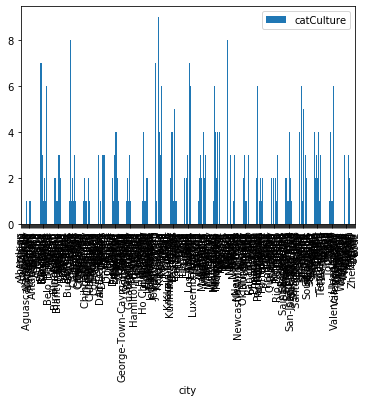

In [41]:
f.plot.bar("city","catCulture")

In the classification, try with and without `catHealth` to see if there is any difference. Initial examination suspects there is not.

# Clustering

In [0]:
from sklearn.cluster import KMeans

In [0]:
# set number of clusters
kclusters = 3

f_clustering = f.drop(['city','lat','lon'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(f_clustering)

# check cluster labels generated for each row in the dataframe
# kmeans.labels_

In [0]:
g = f
if len(g)==10:
    g.insert(0, 'Cluster Labels', kmeans.labels_)
else:
    g['Cluster Labels']= kmeans.labels_

In [45]:
g = g.dropna()
g["Cluster Labels"] = g["Cluster Labels"].astype(int)
g.describe()

,lat,lon,safe,catCulture,catEducation,catHealth,catEnvironment,catInfrastructure,Cluster Labels
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,28.120047,3.577499,55.805922,2.000000,2.994413,0.036313,0.357542,4.994413,0.801676
std,24.224879,75.086607,16.854824,1.813426,2.383410,0.201729,0.976237,3.216723,0.783083
min,-43.532054,-157.858333,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.128721,-73.343785,44.340000,1.000000,1.000000,0.000000,0.000000,3.000000,0.000000
50%,35.206326,8.611910,56.860000,2.000000,3.000000,0.000000,0.000000,5.000000,1.000000
75%,44.942762,47.299753,69.735000,3.000000,4.000000,0.000000,0.000000,7.000000,1.000000
max,64.146582,174.776236,88.970000,9.000000,12.000000,2.000000,9.000000,15.000000,2.000000


# Visualization

In [0]:
# ! pip install folium

In [0]:
import folium # map rendering library
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

In [48]:
map_clusters = folium.Map(location=[0,0], zoom_start=2)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(g['lat'], g['lon'], g['city'], g['Cluster Labels']):
    label = folium.Popup(str(poi) + '. Cluster: ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
#         color=cluster-1,
        fill=True,
        fill_color=rainbow[cluster-1],
#         fill_color=cluster,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Now one can try finding places similar to his

In [49]:
ctest = input("Your reference city: ")

if ctest.lower() in set(g.city.str.lower()):
    idex = g.index[g.city.str.lower() == ctest.lower()].tolist()
    clustervalue = g.iloc[idex]["Cluster Labels"].tolist()
    
    # List
#     print('Similar cities to yours:')
#     print(g[g["Cluster Labels"]==clustervalue[0]].city)
    
else:
    print('Your city is not in the list. Try another.')

Your reference city: london


In [50]:
h = g[g["Cluster Labels"]==clustervalue[0]]
map_clusters = folium.Map(location=[0,0], zoom_start=2)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(h['lat'], h['lon'], h['city'], h['Cluster Labels']):
    label = folium.Popup(str(poi) + '. Cluster: ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon], radius=5, popup=label, color=rainbow[cluster-1], 
                        fill=True, fill_color=rainbow[cluster-1], fill_opacity=0.7).add_to(map_clusters)
map_clusters